This notebook uses auto-regression techniques to study the behavior in the calibration value.

In [1]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker

In [2]:
#load the data
xtal = 54002
test = pd.read_csv('../data/test_diff_{}.csv'.format(xtal), index_col=0)
valid = pd.read_csv('../data/valid_diff_{}.csv'.format(xtal), index_col=0)
train = pd.read_csv('../data/train_diff_{}.csv'.format(xtal), index_col=0)
#set index to datetime periods
#test.index = pd.to_datetime(test.index).to_period('H')
#valid.index = pd.to_datetime(valid.index).to_period('H')
#train.index = pd.to_datetime(train.index).to_period('H')
#set index to datetime
test.index = pd.to_datetime(test.index)
valid.index = pd.to_datetime(valid.index)
train.index = pd.to_datetime(train.index)

#df.index = pd.DatetimeIndex(df.index).to_period('M')
#only take calibration values
test = test[['p2']]
valid = valid[['p2']]
train = train[['p2']]

full = train.append([valid,test])
full.head()

,p2
2018-05-12 09:01:31,0.000188
2018-05-12 10:01:31,0.000194
2018-05-12 11:01:31,0.000227
2018-05-12 12:01:31,0.000301
2018-05-12 13:01:31,0.000416


In [3]:
full.tail()

,p2
2018-12-02 10:36:23,-0.000045
2018-12-02 11:36:23,0.000056
2018-12-02 12:36:23,-0.000011
2018-12-02 13:36:23,0.000034
2018-12-02 14:36:23,-0.000011


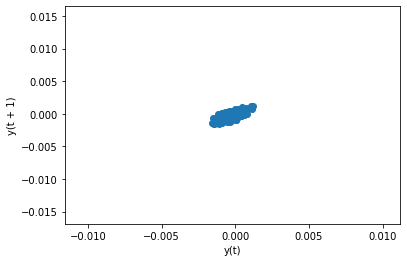

In [4]:
pd.plotting.lag_plot(full.p2, lag=1)

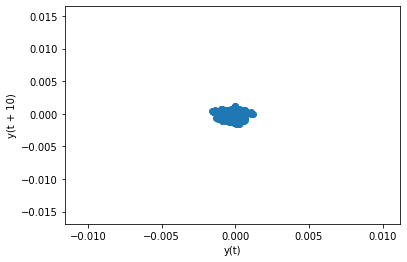

In [5]:
pd.plotting.lag_plot(full.p2, lag=10)

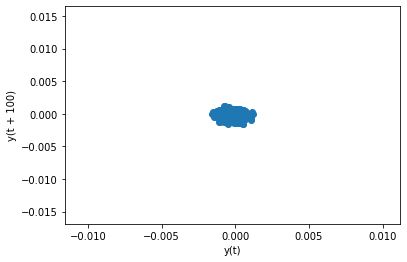

In [6]:
pd.plotting.lag_plot(full.p2, lag=100)

In [7]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=1)

In [8]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=10)

In [9]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=100)

(-0.5, 1)

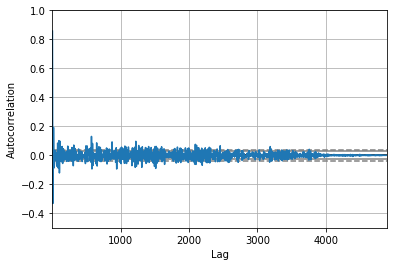

In [10]:
pd.plotting.autocorrelation_plot(full.p2)
plt.ylim([-0.5, 1])

In [11]:
#pd.plotting.autocorrelation_plot(test.int_deliv_inv_ub)
#plt.ylim([-.2,1])

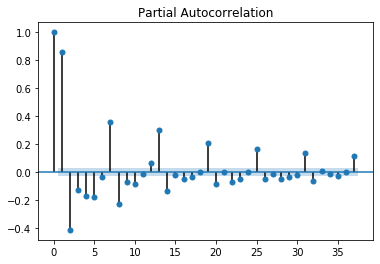

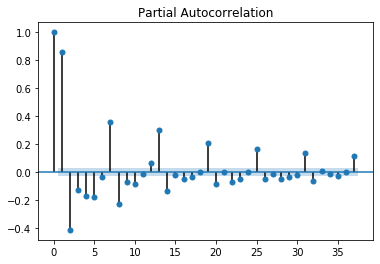

In [12]:
#partial auto-correlation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(full.p2)

In [13]:
#now lets try some autoregression
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [14]:
model = AutoReg(full.p2, 10, old_names=True)
results = model.fit()
results.summary()

/home/rusack/evans908/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                     p2   No. Observations:                 4900
Model:                    AutoReg(10)   Log Likelihood               36349.619
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Wed, 24 Mar 2021   AIC                            -17.700
Time:                        09:24:26   BIC                            -17.684
Sample:                            10   HQIC                           -17.694
                                 4900                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.724e-07   2.05e-06     -0.329      0.742   -4.68e-06    3.34e-06
p2.L1          1.1715      0.014     82.278      0.000       1.144       1.199
p2.L2         -0.3088      0.022    -14.048      0.000      -0.352      -0.266
p2.L3          0.0188      0.022      0.845      0.398      -0.025       0.063
p2.L4         -0.0258      0.021     -1.249      0.212      -0.066       0.015
p2.L5         -0.0316      0.019     -1.620      0.105      -0.070       0.007
p2.L6         -0.4846      0.019    -24.868      0.000      -0.523      -0.446
p2.L7          0.5809      0.021     28.093      0.000       0.540       0.621
p2.L8         -0.1679      0.022     -7.534      0.000      -0.212      -0.124
p2.L9          0.0328      0.022      1.493      0.135      -0.010       0.076
p2.L10        -0.0879      0.014     -6.177      0.000      -0.116      -0.060
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0702           -0.3362j            1.1217           -0.0484
AR.2             1.0702           +0.3362j            1.1217            0.0484
AR.3             0.9528           -0.6661j            1.1626           -0.0971
AR.4             0.9528           +0.6661j            1.1626            0.0971
AR.5             0.0190           -1.1120j            1.1122           -0.2473
AR.6             0.0190           +1.1120j            1.1122            0.2473
AR.7            -0.9848           -0.5373j            1.1219           -0.4205
AR.8            -0.9848           +0.5373j            1.1219            0.4205
AR.9            -0.8705           -1.8814j            2.0730           -0.3190
AR.10           -0.8705           +1.8814j            2.0730            0.3190
------------------------------------------------------------------------------
"""

No handles with labels found to put in legend.


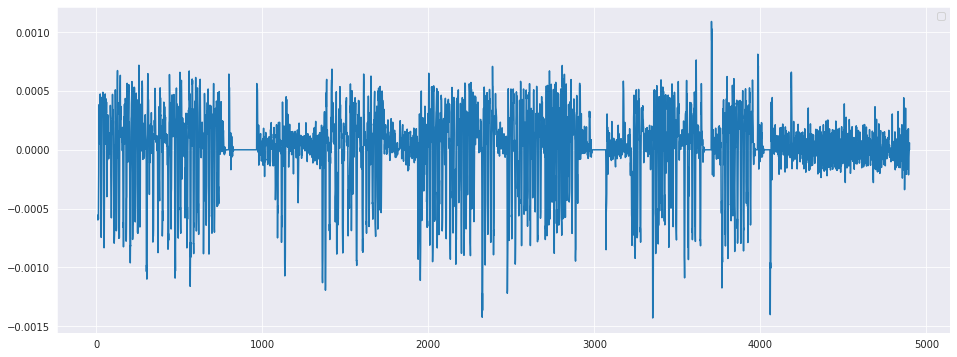

In [15]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(16,6))

figure = results.plot_predict()

/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


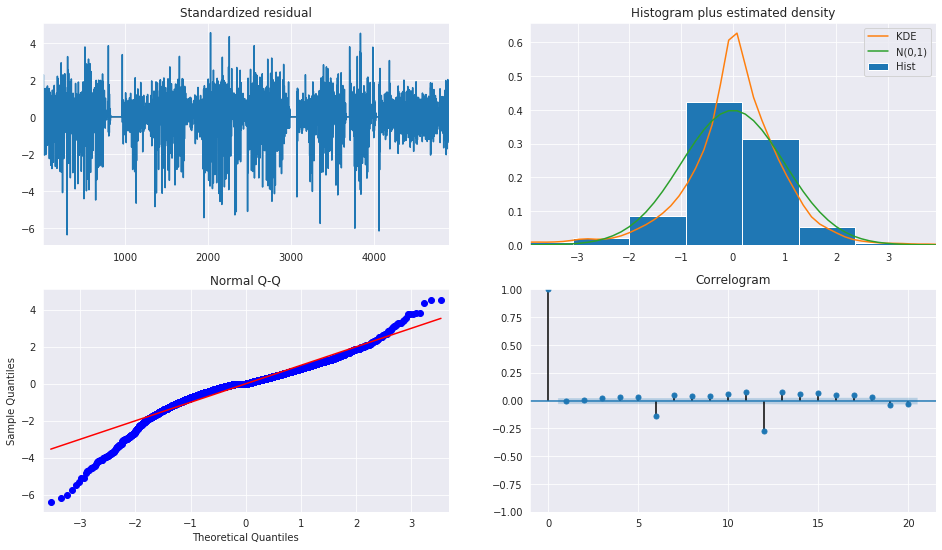

In [16]:
fig = plt.figure(figsize=(16,9))
fig = results.plot_diagnostics(fig=fig, lags=20)

In [17]:
#lets pool the valid and train data together
train = train.append(valid)
train.idxmax()
train.loc['2018-10-13 22:15:27']

p2    0.001173
Name: 2018-10-13 22:15:27, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['p2'] = scaler.fit_transform(train)[:,0]
train.head()

,p2
2018-05-12 09:01:31,0.641196
2018-05-12 10:01:31,0.643174
2018-05-12 11:01:31,0.655289
2018-05-12 12:01:31,0.682109
2018-05-12 13:01:31,0.724232


In [19]:
print(scaler.n_samples_seen_,scaler.data_max_,scaler.data_min_)


3734 [0.0011729] [-0.00157091]


In [20]:
test['p2'] = scaler.transform(test)

#Number of steps to forecast ahead
test_shifted = test.copy()
HORIZON = 3
#create test data points for each horizon
for t in range(1, HORIZON):
    test_shifted['p2+'+str(t)] = test_shifted['p2'].shift(-t, freq='H')
                 
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,p2,p2+1,p2+2
2018-10-15 01:36:23,0.586892,0.558076,0.585202
2018-10-15 02:36:23,0.558076,0.585202,0.603400
2018-10-15 03:36:23,0.585202,0.603400,0.610439
2018-10-15 04:36:23,0.603400,0.610439,0.620019
2018-10-15 05:36:23,0.610439,0.620019,0.616205


In [21]:
#make predictions on the test data
training_window = 500
train_series = train['p2']
test_series = test_shifted




for lag in range(10,11):
    history = [x for x in train_series]
    history = history[(-training_window):]
    predictions = list()
    for t in range(test_series.shape[0]):
        model = AutoReg(history, lag, old_names=False)
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=HORIZON)
        predictions.append(yhat)
        obs = list(test_series.iloc[t])
     
        # move the training window
        history.append(obs[0])
        history.pop(0)
        #print(test_series.index[t])
        #print(t+1, ': predicted =', yhat, 'expected =', obs)
    pred_np = np.array(predictions)
    #calculate MAPE
    mape1 = mape(pred_np[:,0], test_series['p2'])
    mape2 = mape(pred_np[:,1], test_series['p2+1'])
    mape3 = mape(pred_np[:,2], test_series['p2+2'])
    print('Evaluating AR({}):'.format(lag))
    print("MAPE prediction 1 hour  ahead: {:.1%}".format(mape1),
              "\nMAPE prediction 2 hours ahead: {:.1%}".format(mape2),
              "\nMAPE prediction 3 hours ahead: {:.1%}".format(mape3))

Evaluating AR(10):
MAPE prediction 1 hour  ahead: 5.9% 
MAPE prediction 2 hours ahead: 8.3% 
MAPE prediction 3 hours ahead: 9.7%


In [22]:
#not much change, but AR(10) does marginally better than the rest

/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


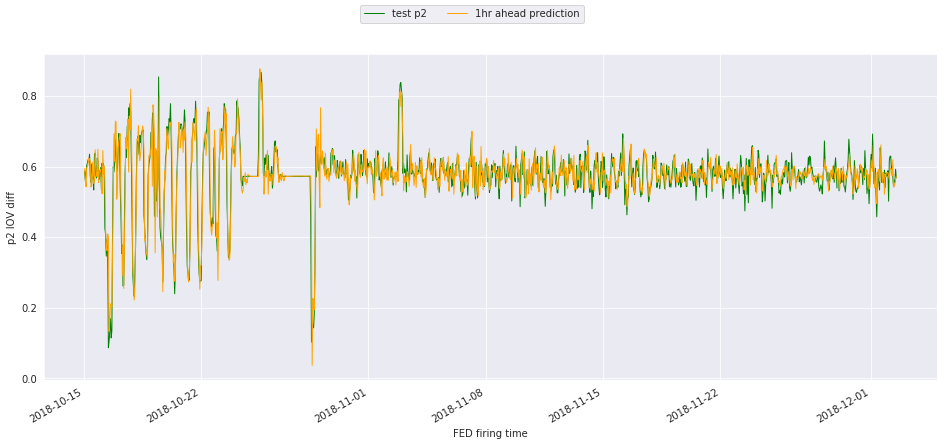

In [23]:
#lets make some plots
fig, ax = plt.subplots()

ax.set_ylabel('p2 IOV diff')
ax.set_xlabel('FED firing time')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#actual data
ax.plot(test_series.index, test_series.p2, 
         label='test p2', color='green', linewidth=1, linestyle='solid')
ax.plot(test_series.index, pred_np[:,0], 
         label='1hr ahead prediction', color='orange', linewidth=1, linestyle='solid')
#legend
fig.legend(ncol=3, loc = 'upper center')
fig.show()

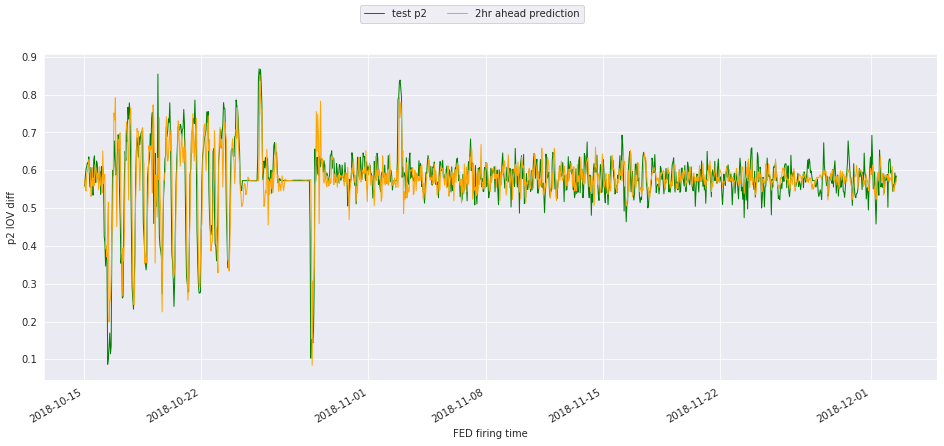

In [24]:
#lets make some plots
fig, ax = plt.subplots()

ax.set_ylabel('p2 IOV diff')
ax.set_xlabel('FED firing time')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#actual data
ax.plot(test_series.index, test_series['p2+1'], 
         label='test p2', color='green', linewidth=1, linestyle='solid')
ax.plot(test_series.index, pred_np[:,1], 
         label='2hr ahead prediction', color='orange', linewidth=1, linestyle='solid')
#legend
fig.legend(ncol=3, loc = 'upper center')
fig.show()


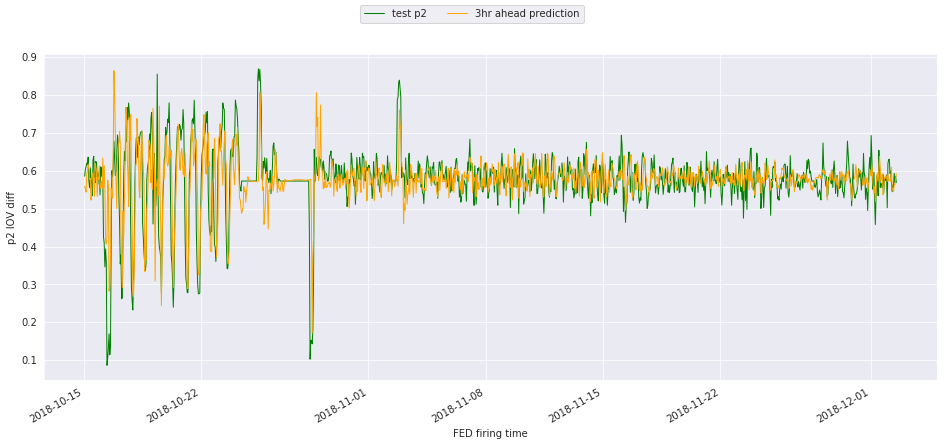

In [25]:
#lets make some plots
fig, ax = plt.subplots()

ax.set_ylabel('p2 IOV diff')
ax.set_xlabel('FED firing time')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#actual data
ax.plot(test_series.index, test_series['p2+2'], 
         label='test p2', color='green', linewidth=1, linestyle='solid')
ax.plot(test_series.index, pred_np[:,2], 
         label='3hr ahead prediction', color='orange', linewidth=1, linestyle='solid')
#legend
fig.legend(ncol=3, loc = 'upper center')
fig.show()

In [26]:
test_inv = test.iloc[:-2,:].copy()
test_inv

,p2
2018-10-15 01:36:23,0.586892
2018-10-15 02:36:23,0.558076
2018-10-15 03:36:23,0.585202
2018-10-15 04:36:23,0.603400
2018-10-15 05:36:23,0.610439
...,...
2018-12-02 08:36:23,0.544415
2018-12-02 09:36:23,0.562076
2018-12-02 10:36:23,0.556013
2018-12-02 11:36:23,0.592860


In [27]:
test_inv['p2'] = scaler.inverse_transform(test_inv)
test_inv = test_inv.cumsum()
pred_df = pd.DataFrame(pred_np, columns=['p2','p2+1','p2+2'])[['p2']]
pred_df['p2'] = scaler.inverse_transform(pred_df)
pred_df = pred_df.cumsum()
pred_df

,p2
0,0.000059
1,0.000036
2,-0.000045
3,0.000024
4,0.000099
...,...
1159,0.012681
1160,0.012603
1161,0.012550
1162,0.012527


/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


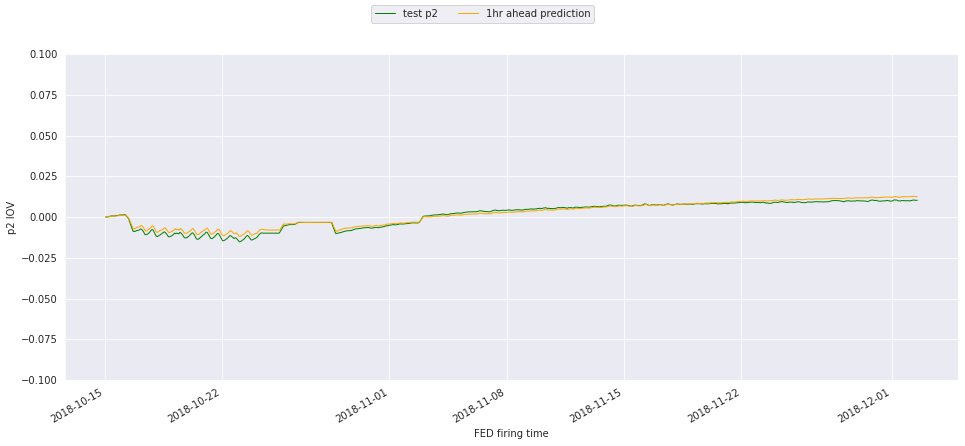

In [28]:
#lets make some plots
fig, ax = plt.subplots()

ax.set_ylabel('p2 IOV')
ax.set_xlabel('FED firing time')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#actual data
ax.plot(test_inv.index, test_inv['p2'], 
         label='test p2', color='green', linewidth=1, linestyle='solid')
ax.plot(test_inv.index, pred_df['p2'], 
         label='1hr ahead prediction', color='orange', linewidth=1, linestyle='solid')
#legend
plt.ylim(-0.1,0.1)
fig.legend(ncol=3, loc = 'upper center')
fig.show()